**Name:** Pratik Supe <br>**Roll No.**54  <br> **Div:** B


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.datasets import imdb
from keras import models, layers

In [ ]:
# Load only top 8000 words instead of 10000 to save memory
MAX_WORDS = 8000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Using smaller subset for demonstration (25% of data)
train_size = len(X_train) // 4
test_size = len(X_test) // 4
X_train = X_train[:train_size]
y_train = y_train[:train_size]
X_test = X_test[:test_size]
y_test = y_test[:test_size]
print(f"Using {len(X_train)} training samples and {len(X_test)} test samples")

Using 6250 training samples and 6250 test samples


In [ ]:
# Vectorization with memory efficiency
def vectorize(sequences, dimension=MAX_WORDS):
    results = np.zeros((len(sequences), dimension), dtype=np.float32)  # Use float32 to save memory
    for i, sequence in enumerate(sequences):
        # Only include words in our vocabulary
        results[i, [j for j in sequence if j < dimension]] = 1
    return results

In [ ]:
# Vectorize in smaller batches to avoid memory overload
def batch_vectorize(sequences, batch_size=1000, dimension=MAX_WORDS):
    results = []
    for i in range(0, len(sequences), batch_size):
        batch = sequences[i:i+batch_size]
        results.append(vectorize(batch, dimension))
    return np.concatenate(results)

print("Vectorizing training data...")
X_train_vec = batch_vectorize(X_train)
print("Vectorizing test data...")
X_test_vec = batch_vectorize(X_test)

Vectorizing training data...
Vectorizing test data...


In [ ]:
# Clear memory by deleting original data
del X_train, X_test
import gc
gc.collect()


59

In [ ]:
# Simple model that uses less memory
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(MAX_WORDS,)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train with smaller batch size
history = model.fit(
    X_train_vec, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(X_test_vec, y_test),
    verbose=1
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.5962 - loss: 0.6629 - val_accuracy: 0.8237 - val_loss: 0.4804
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8312 - loss: 0.4335 - val_accuracy: 0.8642 - val_loss: 0.3539
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9084 - loss: 0.2768 - val_accuracy: 0.8739 - val_loss: 0.3147
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9413 - loss: 0.1961 - val_accuracy: 0.8730 - val_loss: 0.3156
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9631 - loss: 0.1330 - val_accuracy: 0.8736 - val_loss: 0.3345


In [ ]:
# Evaluation
score = model.evaluate(X_test_vec, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.3345
Test accuracy: 0.8736


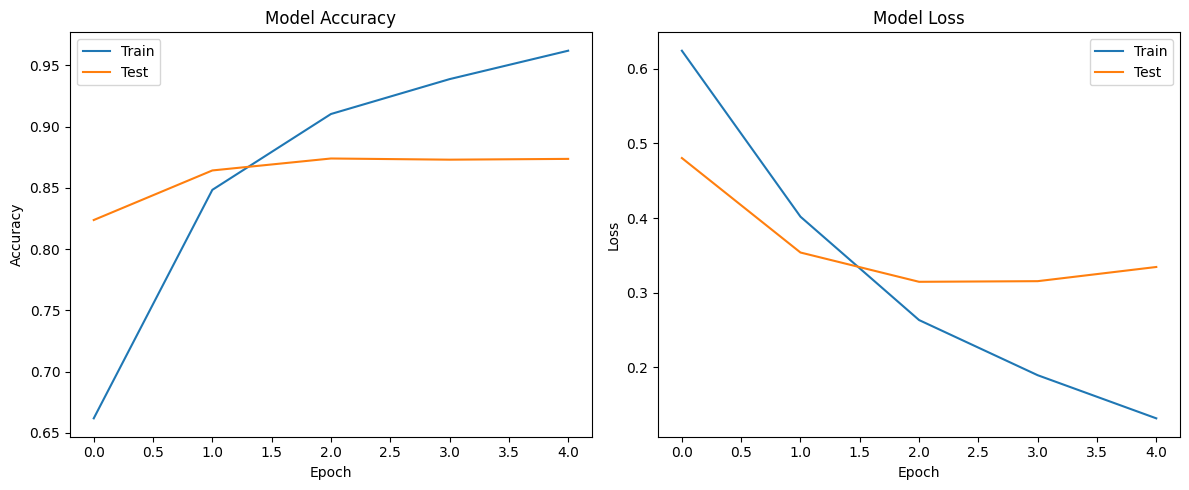

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()